# Imports

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer

# Load Data

In [92]:
df = pd.read_csv('../Data/sub_reddit_data.csv')
df.head(1)

,subreddit,selftext,author_fullname,gilded,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,...,num_crossposts,media,is_video,retrieved_utc,updated_utc,utc_datetime_str,post_hint,preview,link_flair_template_id,author_cakeday
0,AskWomen,[removed],t2_v4u69ho5,0,How about true friendship between men and wome...,[],r/AskWomen,False,6,NaN,...,0,NaN,False,1682375081,1682375081,2023-04-24 22:24:26,NaN,NaN,NaN,NaN


# Clean and select features

In [93]:
df=df[['subreddit','title','hidden','utc_datetime_str', 'num_comments']]

In [94]:
df.head(3)

,subreddit,title,hidden,utc_datetime_str,num_comments
0,AskWomen,How about true friendship between men and wome...,False,2023-04-24 22:24:26,0
1,AskWomen,Does this mean she’s not interested? What shou...,False,2023-04-24 22:18:10,1
2,AskWomen,What’s something that your brain cannot compre...,False,2023-04-24 22:17:10,0


## Feature engineering

In [95]:
#convert the utc_datetime_str into a date time data type
df['utc_datetime_str']= pd.to_datetime(df['utc_datetime_str'])

In [96]:
df.head(1)

,subreddit,title,hidden,utc_datetime_str,num_comments
0,AskWomen,How about true friendship between men and wome...,False,2023-04-24 22:24:26,0


In [90]:
#referenced this stack overflow: https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe
df['title_word_count'] = df['title'].apply(lambda text: len(text.split()))

In [100]:
df['day_num'] = df['utc_datetime_str'].apply(lambda x: x.weekday())

In [101]:
df['day_num'] = df['utc_datetime_str'].apply(lambda x: x.day_name())

In [102]:
df

,subreddit,title,hidden,utc_datetime_str,num_comments,day,day_num
0,AskWomen,How about true friendship between men and wome...,False,2023-04-24 22:24:26,0,0,Monday
1,AskWomen,Does this mean she’s not interested? What shou...,False,2023-04-24 22:18:10,1,0,Monday
2,AskWomen,What’s something that your brain cannot compre...,False,2023-04-24 22:17:10,0,0,Monday
3,AskWomen,Does this mean she’s not interested? What shou...,False,2023-04-24 22:16:55,1,0,Monday
4,AskWomen,"Out of curiosity, what are reasons TO have chi...",False,2023-04-24 22:00:29,1,0,Monday
...,...,...,...,...,...,...,...
3987,AskMen,"Guys, what are some best-fragrance best-perfor...",False,2023-04-20 14:30:59,0,3,Thursday
3988,AskMen,What's the most nerve-wracking bottle to piss in?,False,2023-04-20 14:24:21,0,3,Thursday
3989,AskMen,What's the story of that one breakup that comp...,False,2023-04-20 14:19:10,1,3,Thursday
3990,AskMen,What’s the most attractive thing about a woman??,False,2023-04-20 14:15:35,0,3,Thursday


## Checking value counts

In [56]:
df['title_word_count'].value_counts(sort=True)

9     333
8     325
10    312
12    290
11    269
7     252
13    213
6     206
14    205
15    198
17    153
16    150
18    123
5     108
19    100
20     76
4      74
21     58
23     57
3      51
22     50
2      47
1      42
24     40
25     39
26     27
27     25
31     20
28     19
29     14
30     13
32     11
35      9
34      7
49      6
36      6
39      5
33      5
52      5
37      4
44      4
42      3
38      3
47      3
56      3
41      3
59      3
54      3
43      3
53      2
51      2
40      2
45      2
50      2
46      2
48      1
62      1
58      1
63      1
60      1
Name: title_word_count, dtype: int64

Text(0.5, 0, 'Title word count')

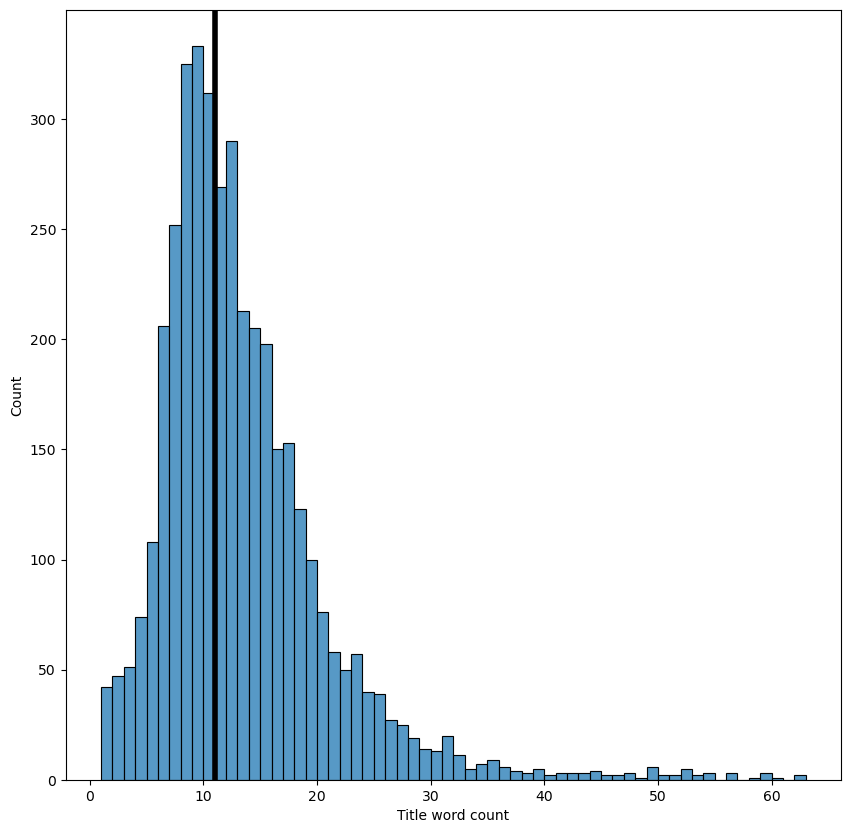

In [69]:
plt.figure(figsize=(10,10))
sns.histplot(data=df['title_word_count'])
plt.axvline(x=df['title_word_count'].median(), color='black', linewidth=4)
plt.xlabel("Title word count")

In [32]:
df.head(1)

,subreddit,title,hidden,utc_datetime_str,title_word_count
0,AskWomen,How about true friendship between men and wome...,False,2023-04-24 22:24:26,10


In [37]:
#check the value counts to ensure it matches what we exported
df['subreddit'].value_counts()

AskMen      1997
AskWomen    1995
Name: subreddit, dtype: int64

In [38]:
'''
I had assumed num_comments was the number of comments within a thread, but thought the valuecounts was weird,
so when I looked at the api documentation it didnt specific what it was.
The Api documentation just states that num_comments is an integer between 1 and 500
'''
df['num_comments'].value_counts()

1    2300
0    1691
3       1
Name: num_comments, dtype: int64

In [23]:
#check the datatypes to see if everything is what they should be
df.dtypes

subreddit           object
title               object
hidden                bool
utc_datetime_str    object
dtype: object

In [27]:
#ensure the datatype is changed
df.dtypes

subreddit                   object
title                       object
hidden                        bool
utc_datetime_str    datetime64[ns]
dtype: object

In [28]:
#check for missing values
df.isnull().sum()

subreddit           0
title               0
hidden              0
utc_datetime_str    0
dtype: int64